In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm
import os

%matplotlib inline
sns.set(style='dark')

### Convert PPM to PNG

In [2]:
PATH = "/Users/akadian/Documents/Data/vln-dump/all_levels_out_dir/"
filenames = [p for p in os.listdir(PATH) if p.endswith('.ppm')]

In [4]:
for filename in tqdm(filenames):
    if os.path.exists(os.path.join("/Users/akadian/Desktop/levels_semantic_maps_1.5m/{}.png".format(filename[:-4]))):
        continue
    path = os.path.join(PATH, filename)
    with open(path) as f:
        lines = f.readlines()
    lines = lines[3:]
    lines = [x.strip().split() for x in lines]
    lines = [[float(y) for y in x] for x in lines]
    data = np.array(lines)
    for r in data:
        for c in r:
            assert int(c) == c
    data = data.astype(np.uint8)
    assert data.shape[1] % 3 == 0
    img_data = np.zeros((data.shape[0], data.shape[1] // 3, 3), dtype=np.uint8)
    for i in range(data.shape[0]):
        ind = 0
        for j in range(0, data.shape[1], 3):
            for k in range(3):
                img_data[i, ind, k] = data[i, j + k]
            ind += 1
    img = Image.fromarray(img_data)
    p = os.path.join("/Users/akadian/Desktop/levels_semantic_maps_1.5m/{}.png".format(filename[:-4]))
    img.save(p, format='PNG')
    test_img = Image.open(p)
    test_img_data = np.array(test_img)
    assert np.array_equal(img_data, test_img_data)

---------------------------------------------------------------------------

### Color Analysis

In [17]:
S = """
RNRgb(0.5, 0.5, 0.5), RNRgb(1, 0, 0), RNRgb(0, 0, 1), 
    RNRgb(0, 1, 0), RNRgb(0, 1, 1), RNRgb(1, 0, 1), 
    RNRgb(1, 0.5, 0), RNRgb(0, 1, 0.5), RNRgb(0.5, 0, 1), 
    RNRgb(0.5, 1, 0), RNRgb(0, 0.5, 1), RNRgb(1, 0, 0.5), 
    RNRgb(0.5, 0, 0), RNRgb(0, 0.5, 0), RNRgb(0, 0, 0.5), 
    RNRgb(0.5, 0.5, 0), RNRgb(0, 0.5, 0.5), RNRgb(0.5, 0, 0.5),
    RNRgb(0.7, 0, 0), RNRgb(0, 0.7, 0), RNRgb(0, 0, 0.7), 
    RNRgb(0.7, 0.7, 0), RNRgb(0, 0.7, 0.7), RNRgb(0.7, 0, 0.7), 
    RNRgb(0.7, 0.3, 0), RNRgb(0, 0.7, 0.3), RNRgb(0.3, 0, 0.7), 
    RNRgb(0.3, 0.7, 0), RNRgb(0, 0.3, 0.7), RNRgb(0.7, 0, 0.3), 
    RNRgb(0.3, 0, 0), RNRgb(0, 0.3, 0), RNRgb(0, 0, 0.3), 
    RNRgb(0.3, 0.3, 0), RNRgb(0, 0.3, 0.3), RNRgb(0.3, 0, 0.3),
    RNRgb(1, 0.3, 0.3), RNRgb(0.3, 1, 0.3), RNRgb(0.3, 0.3, 1), 
    RNRgb(1, 1, 0.3), RNRgb(0.3, 1, 1), RNRgb(1, 0.3, 1), 
    RNRgb(1, 0.5, 0.3), RNRgb(0.3, 1, 0.5), RNRgb(0.5, 0.3, 1), 
    RNRgb(0.5, 1, 0.3), RNRgb(0.3, 0.5, 1), RNRgb(1, 0.3, 0.5), 
    RNRgb(0.5, 0.3, 0.3), RNRgb(0.3, 0.5, 0.3), RNRgb(0.3, 0.3, 0.5), 
    RNRgb(0.5, 0.5, 0.3), RNRgb(0.3, 0.5, 0.5), RNRgb(0.5, 0.3, 0.5),
    RNRgb(0.3, 0.5, 0.5), RNRgb(0.5, 0.3, 0.5), RNRgb(0.5, 0.5, 0.3), 
    RNRgb(0.3, 0.3, 0.5), RNRgb(0.5, 0.3, 0.3), RNRgb(0.3, 0.5, 0.3), 
    RNRgb(0.3, 0.8, 0.5), RNRgb(0.5, 0.3, 0.8), RNRgb(0.8, 0.5, 0.3), 
    RNRgb(0.8, 0.3, 0.5), RNRgb(0.5, 0.8, 0.3), RNRgb(0.3, 0.5, 0.8), 
    RNRgb(0.8, 0.5, 0.5), RNRgb(0.5, 0.8, 0.5), RNRgb(0.5, 0.5, 0.8), 
    RNRgb(0.8, 0.8, 0.5), RNRgb(0.5, 0.8, 0.8), RNRgb(0.8, 0.5, 0.8)
"""

A = [x for x in S.strip().split("RNRgb") if x.startswith('(')]

B = [a.strip()[1:-2].split(",") for a in A]

B = [np.array([float(x) for x in y]) for y in B]

In [18]:
valid_positions = []
invalid_positions = []
EPS = 1.0

for i in tqdm(range(img_data.shape[0]), total=img_data.shape[0]):
    for j in range(img_data.shape[1]):
        if img_data[i, j, 0] == 0 and img_data[i, j, 1] == 0 and img_data[i, j, 2] == 0:
            continue
        is_valid = False
        for b in B:
            b = b * 255.0
            t = np.abs(b - img_data[i, j])
            if t[0] < EPS and t[1] < EPS and t[2] < EPS:
                valid_positions.append((i, j))
                is_valid = True
                break
        if not is_valid:
            invalid_positions.append((i, j))

100%|██████████| 452/452 [00:07<00:00, 57.07it/s]


In [19]:
len(valid_positions), len(invalid_positions)

(252462, 0)

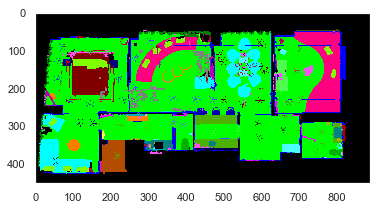

In [20]:
plt.imshow(img_data)

In [21]:
new_img_data = np.zeros(img_data.shape)
for i in range(new_img_data.shape[0]):
    for j in range(new_img_data.shape[1]):
        new_img_data[i, j] = img_data[i, j]
new_img_data = new_img_data.astype('uint8')
for x in invalid_positions:
    new_img_data[x] = 255

In [22]:
Image.fromarray(img_data).save("/Users/akadian/Desktop/temp_1.png")
Image.fromarray(new_img_data).save("/Users/akadian/Desktop/temp_2.png")

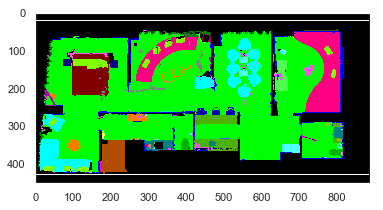

In [119]:
plt.imshow(new_img_data)

In [40]:
timage = Image.fromarray(img_data)
timage.save("/Users/akadian/Desktop/timage.png")

In [80]:
len(valid_colors)

62

In [81]:
count_present / count_total

0.42775764755069334